# Clonamos el repositorio para obtener los dataSet

In [ ]:
!git clone https://github.com/joanby/tensorflow.git

# Damos acceso a nuestro Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Test it

In [ ]:
!ls '/content/drive/My Drive' 

# Google colab tools

In [1]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

##Especificando la versión de TensorFlow

Ejecutando "importar tensorflow" importará la versión por defecto (actualmente 2.x). Puedes usar la 1.x ejecutando una celda con la "versión mágica de tensorflow" **antes de ejecutar "importar tensorflow".

### Si no funciona hacer el pip install


In [2]:
#!pip install tensorflow==1.14
%tensorflow_version 1.x

TensorFlow 1.x selected.


# Importar Tensorflow

In [3]:
import tensorflow as tf
print(tf.__version__)
import matplotlib.pyplot as plt

1.15.2


In [4]:
session = tf.Session()

# Predicción de la longitud del sépalo en función de la anchura del pétalo 

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

In [18]:
iris = datasets.load_iris()

In [19]:
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([x[0] for x in iris.data])

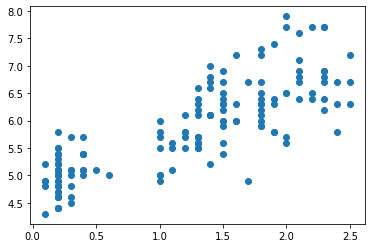

In [20]:
plt.plot(x_vals, y_vals, 'o', label = "Datos")

In [21]:
learning_rate = 0.05
batch_size = 25
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype = tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

$$y = Ax+b$$

In [22]:
y_predict = tf.add(tf.matmul(x_data, A), b)

In [23]:
loss_l2 = tf.reduce_mean(tf.square(y_target-y_predict))
my_optim = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_step = my_optim.minimize(loss_l2)
init = tf.global_variables_initializer()
session.run(init)

In [24]:
loss_vect_l2 = []
for i in range(100):
    rand_idx = np.random.choice(len(x_vals), size = batch_size)
    rand_x = np.transpose([x_vals[rand_idx]])
    rand_y = np.transpose([y_vals[rand_idx]])

    session.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = session.run(loss_l2, feed_dict={x_data:rand_x, y_target: rand_y})
    loss_vect_l2.append(temp_loss)
    if(i+1)%10==0:
        print("Paso #"+str(i+1)+", A="+str(session.run(A))+", b="+str(session.run(b))+
             ", Loss = "+str(temp_loss))

Paso #10, A=[[2.5702639]], b=[[1.8940201]], Loss = 2.238242
Paso #20, A=[[2.443565]], b=[[2.546067]], Loss = 1.6046851
Paso #30, A=[[2.0648012]], b=[[2.9470484]], Loss = 0.90077937
Paso #40, A=[[1.9316216]], b=[[3.3213344]], Loss = 1.0937263
Paso #50, A=[[1.6970257]], b=[[3.5994139]], Loss = 0.60091
Paso #60, A=[[1.5318245]], b=[[3.7921991]], Loss = 0.49860883
Paso #70, A=[[1.4156036]], b=[[3.9803624]], Loss = 0.416111
Paso #80, A=[[1.3282495]], b=[[4.1564927]], Loss = 0.3479068
Paso #90, A=[[1.264422]], b=[[4.271212]], Loss = 0.23886634
Paso #100, A=[[1.2179828]], b=[[4.3918557]], Loss = 0.25204197


In [25]:
[[slope]] = session.run(A)
[[intercept]] = session.run(b)

In [26]:
print(str(slope)+"x+"+str(intercept))

1.2179828x+4.3918557


In [27]:
best_fit = []
for i in x_vals:
    best_fit.append(slope*i+intercept)

In [ ]:
A_tensor = tf.constant(A)
b_tensor = tf.constant(b)

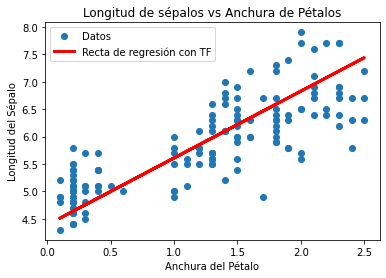

In [28]:
plt.plot(x_vals, y_vals, 'o', label = "Datos")
plt.plot(x_vals, best_fit, 'r-', label="Recta de regresión con TF", linewidth=3)
plt.legend(loc = "upper left")
plt.title("Longitud de sépalos vs Anchura de Pétalos")
plt.xlabel("Anchura del Pétalo")
plt.ylabel("Longitud del Sépalo")
plt.show()

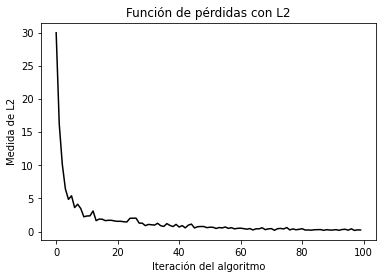

In [29]:
plt.plot(loss_vect_l2, "k-")
plt.title("Función de pérdidas con L2")
plt.xlabel("Iteración del algoritmo")
plt.ylabel("Medida de L2")
plt.show()

In [30]:
from tensorflow.python.framework import ops
ops.reset_default_graph()
session = tf.Session()

In [31]:
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype = tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

In [32]:
y_predict = tf.add(tf.matmul(x_data, A), b)

In [33]:
loss_l1 = tf.reduce_mean(tf.abs(y_target-y_predict))
my_optim = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_step = my_optim.minimize(loss_l1)
init = tf.global_variables_initializer()
session.run(init)

In [34]:
loss_vect_l1 = []
for i in range(1000):
    rand_idx = np.random.choice(len(x_vals), size = batch_size)
    rand_x = np.transpose([x_vals[rand_idx]])
    rand_y = np.transpose([y_vals[rand_idx]])

    session.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = session.run(loss_l1, feed_dict={x_data:rand_x, y_target: rand_y})
    loss_vect_l1.append(temp_loss)
    if(i+1)%10==0:
        print("Paso #"+str(i+1)+", A="+str(session.run(A))+", b="+str(session.run(b))+
             ", Loss = "+str(temp_loss))

Paso #10, A=[[-0.68044317]], b=[[0.4101694]], Loss = 6.098814
Paso #20, A=[[-0.06924318]], b=[[0.9101695]], Loss = 5.282063
Paso #30, A=[[0.55795676]], b=[[1.4101691]], Loss = 3.8800235
Paso #40, A=[[1.1767567]], b=[[1.9101686]], Loss = 2.6108954
Paso #50, A=[[1.7673566]], b=[[2.3981683]], Loss = 1.2578897
Paso #60, A=[[2.0065567]], b=[[2.730168]], Loss = 0.8926019
Paso #70, A=[[2.0241568]], b=[[2.942168]], Loss = 0.818137
Paso #80, A=[[1.9581567]], b=[[3.098168]], Loss = 0.8434971
Paso #90, A=[[1.8269566]], b=[[3.2181678]], Loss = 0.73853385
Paso #100, A=[[1.7341566]], b=[[3.3421674]], Loss = 0.7229905
Paso #110, A=[[1.6783565]], b=[[3.4901671]], Loss = 0.7740648
Paso #120, A=[[1.6171564]], b=[[3.618167]], Loss = 0.6119963
Paso #130, A=[[1.4913564]], b=[[3.722167]], Loss = 0.6798033
Paso #140, A=[[1.4779564]], b=[[3.8741667]], Loss = 0.49725068
Paso #150, A=[[1.3627564]], b=[[3.9661665]], Loss = 0.46410087
Paso #160, A=[[1.2995563]], b=[[4.106167]], Loss = 0.47439674
Paso #170, A=[[1.

In [35]:
[[slope]] = session.run(A)
[[intercept]] = session.run(b)

In [36]:
print(str(slope)+"x+"+str(intercept))

0.8271549x+4.7741714


In [37]:
best_fit = []
for i in x_vals:
    best_fit.append(slope*i+intercept)

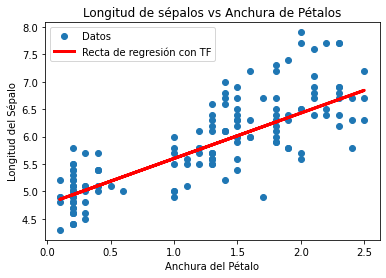

In [38]:
plt.plot(x_vals, y_vals, 'o', label = "Datos")
plt.plot(x_vals, best_fit, 'r-', label="Recta de regresión con TF", linewidth=3)
plt.legend(loc = "upper left")
plt.title("Longitud de sépalos vs Anchura de Pétalos")
plt.xlabel("Anchura del Pétalo")
plt.ylabel("Longitud del Sépalo")
plt.show()

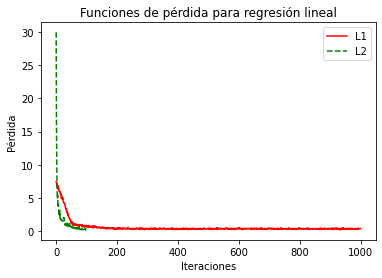

In [39]:
plt.plot(loss_vect_l1, 'r-', label = "L1")
plt.plot(loss_vect_l2, 'g--', label = "L2")
plt.title("Funciones de pérdida para regresión lineal")
plt.xlabel("Iteraciones")
plt.ylabel("Pérdida")
plt.legend(loc = "upper right")
plt.show()

In [40]:
slope*np.mean(x_vals)+intercept

5.766205765565236

In [41]:
intercept

4.7741714

In [42]:
np.mean(y_vals)

5.843333333333334